# Redes convolucionales basicas

In [22]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [23]:
import tensorflow

In [24]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [13]:
import keras
keras.__version__

'2.12.0'

In [27]:
train_images[0][1,1]

0

In [28]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [29]:
train_images[0][1,1]

array([0.], dtype=float32)

In [30]:
train_images[0].shape # donde ahora tenemos una lista de 1 numero antes teniamos 1 numero
# porque necesitamos la lista? porque esa dimension es la de los canales

(28, 28, 1)

In [31]:
from keras import layers
from keras import models
model = models.Sequential()

##### Parte Convolucional
# 32 filters/neuronas, convolución/filtro 3x3, se reduce la dimension a 26x26x 32 (chanel)
### Conv2D(output_depth/numero de neuronas, (tamaño del filtro(dimensiones)), 
#### stride(paso con el que muevo el filtro), padding (numero de 0 que pongo alrededor))
conv_layer1 = layers.Conv2D(32, (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1))
model.add(conv_layer1)
# Max pooling 2d (2,2) se escoje el maximo de los quadrados 2x2, los filters se quedan igual
# se reduce la dimensión a la mitad (porque se asume que e stride = 2)
model.add(layers.MaxPooling2D((2, 2))) # 13x13x32
# 64 filters, cada uno convolución (3,3), se reduce dimension en -2 a 11
model.add(layers.Conv2D(64, (3, 3), padding='valid', activation='relu')) # 11x11x64
# Max Pooling (2,2) se divide la dimension por la mitad
model.add(layers.MaxPooling2D((2, 2)))# 5x5x64

#### Parte de Clasificación
# hacemos de todo eso un tensor unidimensional
model.add(layers.Flatten())
# el output (o activaciones) del layer de 64 se reaciona con 10 outputs que seran las probabilidades de ser cada uno de los numeros
model.add(layers.Dense(10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [37]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
model.fit(train_images, train_labels, 
          epochs=5, 
          batch_size=100, 
          validation_data=(test_images, test_labels))

Epoch 1/5
600/600 [==============================] - 44s 72ms/step - loss: 0.2262 - accuracy: 0.9344 - val_loss: 0.0715 - val_accuracy: 0.9779
Epoch 2/5
600/600 [==============================] - 41s 69ms/step - loss: 0.0689 - accuracy: 0.9793 - val_loss: 0.0550 - val_accuracy: 0.9830
Epoch 3/5
600/600 [==============================] - 34s 56ms/step - loss: 0.0507 - accuracy: 0.9849 - val_loss: 0.0455 - val_accuracy: 0.9861
Epoch 4/5
600/600 [==============================] - 41s 68ms/step - loss: 0.0406 - accuracy: 0.9883 - val_loss: 0.0443 - val_accuracy: 0.9859
Epoch 5/5
600/600 [==============================] - 40s 66ms/step - loss: 0.0343 - accuracy: 0.9900 - val_loss: 0.0383 - val_accuracy: 0.9866


In [12]:
model.save("modelo_prueva.h5")

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc
# ayer conseguimos un 0.9845

313/313 [==============================] - 1s 4ms/step - loss: 0.0542 - accuracy: 0.9816


0.9815999865531921

In [39]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
datagen = ImageDataGenerator(rotation_range = 30,# valor entre 0 y 180 que harà rotar de forma random las imagenes
                             width_shift_range = 0.1, # transladar la imagen horizontalmente
                             height_shift_range = 0.1,# transladar la imagen verticalmente
                             shear_range=1.2, # sharing transformations (aplicaciones lineales)
                             zoom_range=0.1, # hacer zoom a la imagen
                             horizontal_flip=False, # hacer el espejo
                             fill_mode='nearest') # la forma de rellenar los pixeles que quedan vacios tras las transformaciones


In [42]:
train_images

(60000, 28, 28, 1)

In [43]:
x = train_images[0] # cojo una imagen
print(x.shape)
x = x.reshape((1,) + x.shape) # cambio el formato, para que esté acorde al formato que pide un gennerador
x.shape

(28, 28, 1)


(1, 28, 28, 1)

In [16]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
x.shape

(1, 28, 28, 1)

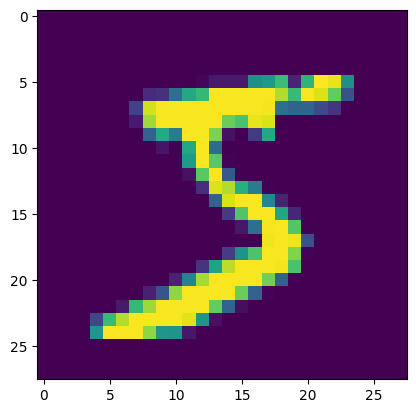

In [18]:
plt.imshow(array_to_img(x[0]))
plt.show()

(1, 28, 28, 1)
(1, 28, 28, 1)
(1, 28, 28, 1)
(1, 28, 28, 1)
(1, 28, 28, 1)
(1, 28, 28, 1)
(1, 28, 28, 1)
(1, 28, 28, 1)
(1, 28, 28, 1)


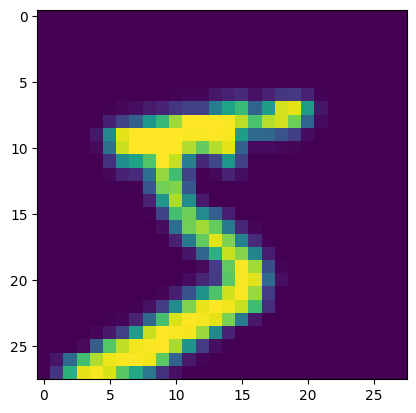

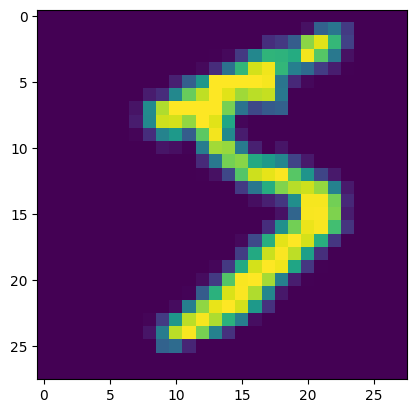

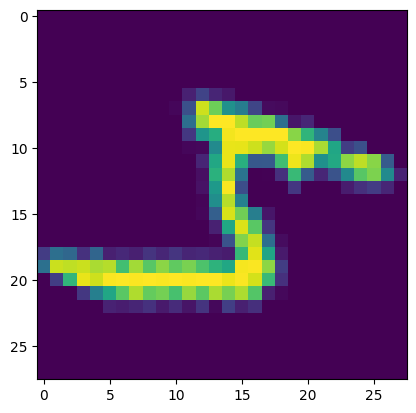

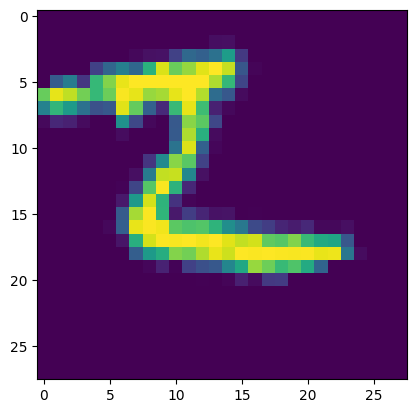

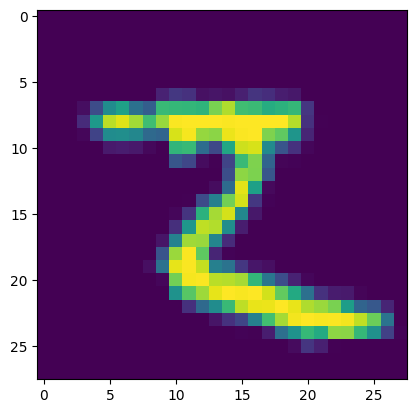

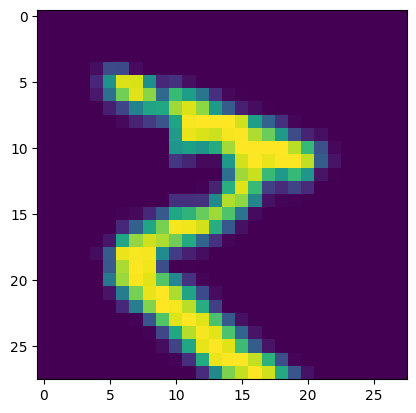

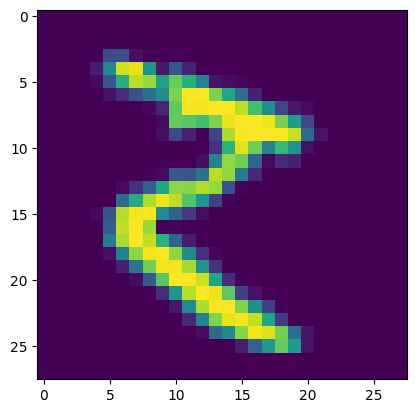

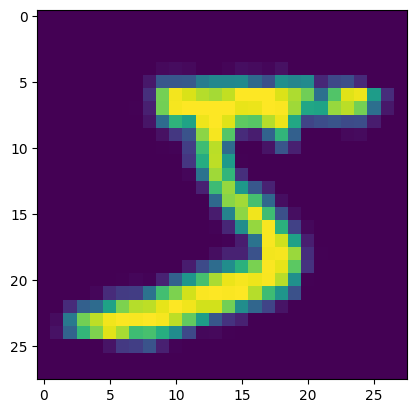

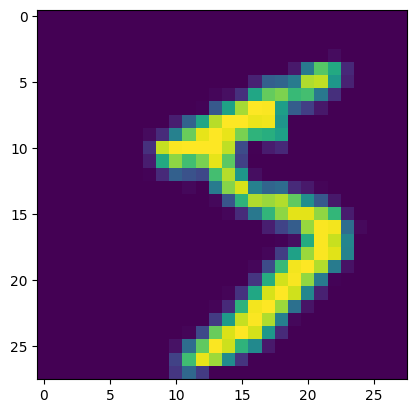

In [44]:
i=0
# datagen.flow es un iterador que genera imagenes de forma indefinida, por lo tanto hayq ue hacer un break
for batch in datagen.flow(x, batch_size=10): # le paso el dataset, cuantas muesras quiero que me genere
    print(batch.shape)
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i+=1
    if i%9==0:
        break
plt.show()
# datagen.flow()
# dataframe
# directorio

In [46]:
train_generator = datagen.flow(
    train_images, # == X_train
    train_labels, # == Y_train
    batch_size=100) # esto estaba en el for

# las 60K imagenes cargadas en formato numpy
# solo entrenamos con 100
# si tenemos 1M


test_datagen = ImageDataGenerator()
validation_generator = test_datagen.flow(
    test_images,
    test_labels,
    batch_size=100)

In [49]:
train_generator

In [50]:
history = model.fit(
    train_generator, # (X,Y)
    steps_per_epoch=60, # cuantas veces pedira batches a los generadores por cada epoch
    epochs=20, 
    shuffle=True,
    validation_data = (test_images,test_labels), # (X_test, Y_test)
    validation_steps=10)

Epoch 1/20
60/60 [==============================] - 10s 150ms/step - loss: 0.3758 - accuracy: 0.8877 - val_loss: 0.0424 - val_accuracy: 0.9883
Epoch 2/20
60/60 [==============================] - 9s 147ms/step - loss: 0.2637 - accuracy: 0.9198 - val_loss: 0.0338 - val_accuracy: 0.9895
Epoch 3/20
60/60 [==============================] - 8s 126ms/step - loss: 0.2096 - accuracy: 0.9368 - val_loss: 0.0448 - val_accuracy: 0.9848
Epoch 4/20
60/60 [==============================] - 8s 138ms/step - loss: 0.1953 - accuracy: 0.9410 - val_loss: 0.0444 - val_accuracy: 0.9846
Epoch 5/20
60/60 [==============================] - 8s 136ms/step - loss: 0.1883 - accuracy: 0.9407 - val_loss: 0.0371 - val_accuracy: 0.9877
Epoch 6/20
60/60 [==============================] - 7s 123ms/step - loss: 0.1645 - accuracy: 0.9493 - val_loss: 0.0394 - val_accuracy: 0.9863
Epoch 7/20
60/60 [==============================] - 9s 142ms/step - loss: 0.1442 - accuracy: 0.9543 - val_loss: 0.0424 - val_accuracy: 0.9859
Epoch

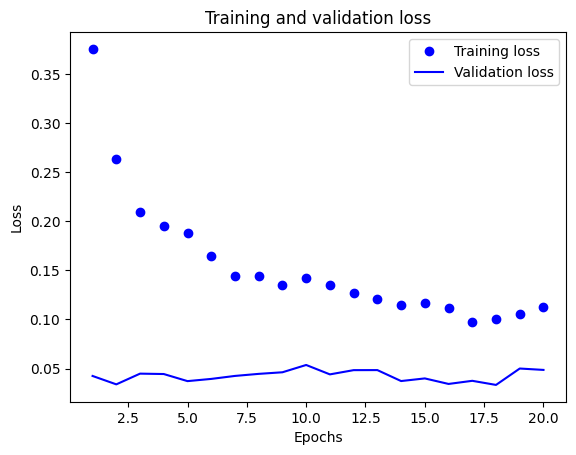

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()